In [1]:
import pandas as pd
import numpy as np
import category_encoders

In [2]:
data = pd.read_csv("~/Documents/github/pd2WUM/allegro-api-transactions.csv")

In [3]:
data.describe()

,lp,item_id,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating
count,420020.00000,4.200200e+05,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000
mean,210009.50000,5.809067e+09,0.877972,0.812495,76.811350,0.583456,6748.274823,0.016694,20402.593496
std,121249.47437,3.387402e+08,0.327318,0.390317,390.326271,0.492987,23387.248064,0.128124,36682.898636
min,0.00000,4.179879e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,105004.75000,5.652990e+09,1.000000,1.000000,9.000000,0.000000,6.000000,0.000000,1581.000000
50%,210009.50000,5.968052e+09,1.000000,1.000000,24.990000,1.000000,95.000000,0.000000,6711.000000
75%,315014.25000,6.070760e+09,1.000000,1.000000,68.450000,1.000000,931.000000,0.000000,21007.000000
max,420019.00000,6.099927e+09,1.000000,1.000000,119000.000000,1.000000,99999.000000,1.000000,292074.000000


# Kodowanie zmiennych kategorycznych

## Target encoding

In [4]:
enc = category_encoders.target_encoder.TargetEncoder(data)
data_enc = data.copy()
encoded=enc.fit_transform(data['it_location'],data['price'])
data_enc['target_encoded'] = encoded

In [5]:
data_enc[['it_location','price','target_encoded']]

,it_location,price,target_encoded
0,Warszawa,59.99,85.423398
1,Warszawa,4.90,85.423398
2,Leszno,109.90,61.990914
3,Wola Krzysztoporska,18.50,35.433365
4,BIAŁYSTOK,19.90,117.191956
...,...,...,...
420015,Kraśnik,180.00,24.306929
420016,Dzierżoniów,14.99,66.785334
420017,Supraśl,5.99,18.682800
420018,Poznań,200.00,106.203076


Target encoding liczy średnią wartość zmiennej celu dla każdej kategorii, największą przewagą Target encodingu nad One Hotem jest fakt, iż potrzebujemy zawsze jednej kolumny dla zakodowanych wartości. W przypadku One Hota potrzeba ich tyle, ile mamy kategorii, co może znacznie zwiększyć rozmiar ramki danych.

## One Hot encoding

W przypadku One Hota dla kolumny 'main_category' do zakodowania potrzeba utworzyć aż 27 kolumn, gdzie wśród nich w każdym wierszu będzie jedna jedynka i wiele zer. Dla takiej liczby unikalnych kategorii jest to niopłacalne ze względu na koszt pamięciowy.

In [6]:
from sklearn.preprocessing import OneHotEncoder
data_enc1=data.copy()

enc1 = OneHotEncoder(sparse=False)
temp = pd.DataFrame(enc1.fit_transform(data_enc1[['main_category']]))
temp.columns = enc1.get_feature_names(['main_category'])
data_enc1 = pd.concat([data_enc1, temp], axis=1)

data_enc1.loc[1:10, "main_category":"main_category_Zdrowie"]


,main_category,main_category_Antyki i Sztuka,main_category_Bilety,main_category_Biuro i Reklama,main_category_Biżuteria i Zegarki,main_category_Delikatesy,main_category_Dla Dzieci,main_category_Dom i Ogród,main_category_Filmy,main_category_Fotografia,...,main_category_Nieruchomości,"main_category_Odzież, Obuwie, Dodatki",main_category_Przemysł,main_category_RTV i AGD,main_category_Rękodzieło,main_category_Sport i Turystyka,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Telefony i Akcesoria,main_category_Uroda,main_category_Zdrowie
1,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dom i Ogród,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Książki i Komiksy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Biżuteria i Zegarki,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,RTV i AGD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,RTV i AGD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Biżuteria i Zegarki,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Leave One Out encoding

Leave One Out encoding to kodowanie podobne do Target encodingu, z tą różnicą że do liczenia średniej z kategorii nie bierzemy pod uwagę obecnego wiersza.

In [7]:
enc2 = category_encoders.leave_one_out.LeaveOneOutEncoder(data)
data_enc2 = data.copy()
encoded = enc2.fit_transform(data['main_category'],data['it_is_allegro_standard'])
data_enc2['target_encoded'] = encoded

In [8]:
data_enc2[['main_category', 'it_is_allegro_standard', 'target_encoded']]

,main_category,it_is_allegro_standard,target_encoded
0,Komputery,1,0.513112
1,"Odzież, Obuwie, Dodatki",1,0.615748
2,Dom i Ogród,1,0.595018
3,Książki i Komiksy,0,0.538329
4,"Odzież, Obuwie, Dodatki",1,0.615748
...,...,...,...
420015,RTV i AGD,0,0.652507
420016,Uroda,1,0.492686
420017,"Odzież, Obuwie, Dodatki",1,0.615748
420018,Dla Dzieci,0,0.616040


## Binary encoding

Binary encoding jest podobny do One Hota, tyle że wykorzystuje logarytmicznie mniej kolumn, jako że pozwala na umiejscowienie wielu jedynek w jednym wierszu. Tracimy za to informację o nazwie kategorii w nazwach kolumn używanych do kodowania.

In [9]:
enc3 = category_encoders.BinaryEncoder(cols = ['main_category'])
data_enc3 = enc3.fit_transform(data)
data_enc3.loc[1:7,:]

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,0,0,0,0,1,0
5,5,2016-04-03 16:31:01,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,0,0,0,0,1,0
6,6,2016-04-03 17:56:11,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,0,0,0,0,1,0
7,7,2016-04-03 11:58:55,4824025074,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,1,handel_barbo,28.99,1,886,0,4287,Legionowo,0,0,0,1,0,1


# Uzupełnianie braków

In [10]:
data = data[["price", "it_seller_rating", "it_quantity"]]

W związku z problemami wydajnościowymi, ograniczę się do pierwszych 100 tysięcy rekordów.

In [11]:
data = data.loc[0:99999,:]

In [12]:
data

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950
...,...,...,...
99995,4.99,1355,83
99996,19.90,7071,27
99997,41.45,65661,9150
99998,41.45,65661,9150


In [13]:
data.describe()

,price,it_seller_rating,it_quantity
count,100000.000000,100000.000000,100000.000000
mean,78.358297,20292.854330,6907.944340
std,456.580884,36492.599109,23630.800906
min,0.000000,-1.000000,0.000000
25%,9.000000,1569.000000,6.000000
50%,25.000000,6692.000000,95.000000
75%,69.000000,20887.250000,935.000000
max,119000.000000,292069.000000,99999.000000


Będę stosował algorytm Nearest Neighbors Imputation

In [14]:
original = data.copy()
original = original['it_seller_rating']
from sklearn.impute import KNNImputer

In [15]:
def column(matrix, i):
    return [row[i] for row in matrix]

results1 = []
for z in range(10):
    imputed = data.copy()
    temp=imputed['it_seller_rating']
    idx = np.random.choice(100000, 10000, replace=False)
    temp = temp.astype(float)
    temp.values[idx]=np.nan
    imputed = imputed.assign(it_seller_rating=temp)
    imputer = KNNImputer(n_neighbors=3, weights="uniform")
    imputed=imputer.fit_transform(imputed)
    vals = column(imputed, 1)
    
    errors = []
    for i in range(len(idx)):
        p = original.loc[idx[i]] - vals[idx[i]]
        errors.append(p**2)
    
    results1.append(np.sqrt(np.mean(errors)))

In [16]:
results1

[34655.0294443024,
 34512.18817765255,
 34558.67018323413,
 35054.159106306884,
 35227.79837506486,
 34054.28802656543,
 34939.34851181814,
 35021.20629706759,
 36039.272978500674,
 34023.42037143336]

In [17]:
np.std(results1)

563.2301043705629

In [18]:
original = data.copy()
original = original['it_seller_rating']
results2 = []
for z in range(10):
    imputed = data.copy()
    temp=imputed['it_seller_rating']
    idx1 = np.random.choice(100000, 10000, replace=False)
    temp = temp.astype(float)
    temp.values[idx1]=np.nan
    imputed = imputed.assign(it_seller_rating=temp)
    temp=imputed['it_quantity']
    idx2 = np.random.choice(100000, 10000, replace=False)
    temp = temp.astype(float)
    temp.values[idx2]=np.nan
    imputed = imputed.assign(it_quantity=temp)
    imputer = KNNImputer(n_neighbors=3, weights="uniform")
    imputed=imputer.fit_transform(imputed)
    vals = column(imputed, 1)
    
    errors = []
    for i in range(len(idx1)):
        p = original.loc[idx1[i]] - vals[idx1[i]]
        errors.append(p**2)
    
    results2.append(np.sqrt(np.mean(errors)))

In [19]:
results2

[40355.713916321685,
 39037.57236022425,
 41544.708184558236,
 39682.79136896356,
 40590.5980863348,
 38486.91432830673,
 39298.708774960476,
 39921.86592960457,
 38030.60655448217,
 39309.287832745926]

In [20]:
np.std(results2)

981.4073753978786

In [21]:
import matplotlib.pyplot as plt

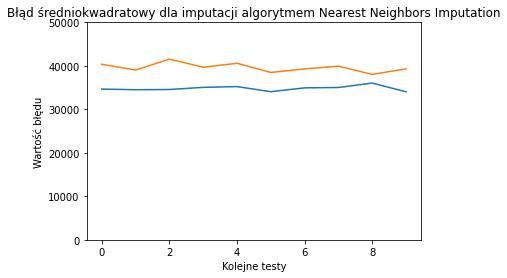

In [22]:
plt.plot(results1)
plt.plot(results2)

plt.ylim(0, 50000)
plt.xlabel("Kolejne testy")
plt.ylabel("Wartość błędu")
plt.title("Błąd średniokwadratowy dla imputacji algorytmem Nearest Neighbors Imputation")
plt.show()

Zgodnie z oczekiwaniami w drugim przypadku średni błąd zwiększył się - wynika to z utraty większej ilości danych.